In [1]:
from XSpect_EW_class import *
from XSpect_EW_func import *

Working


In [2]:
#sun
sun_blue = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/spectra/sun/sunb.fits'
sun_red = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/spectra/sun/sunr.fits'
sun_inf = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/spectra/sun/suni.fits'

In [17]:
%%time
#load files individually
sun_b = Spectrum_Data(sun_blue)
sun_r = Spectrum_Data(sun_red)
sun_i = Spectrum_Data(sun_inf)

CRVL stuff not found
CRVL stuff not found
CRVL stuff not found
CPU times: user 184 ms, sys: 45.2 ms, total: 229 ms
Wall time: 299 ms


In [18]:
print(sun_b.pred_var_all)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:72: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(self.flux[order][clipl:clipr])
/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:99: RuntimeWarning: invalid value encountered in true_divide
  self.normalized_flux[order][clipl:clipr] = self.flux[order][clipl:clipr]/pred


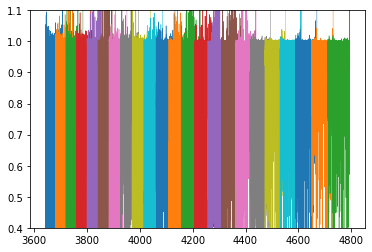

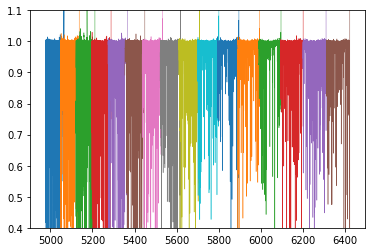

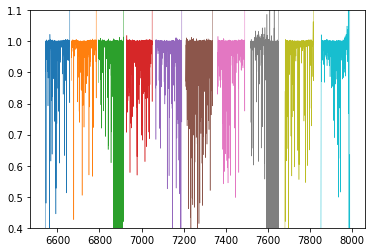

CPU times: user 55.7 s, sys: 1.65 s, total: 57.3 s
Wall time: 29.9 s


In [5]:
%%time
test = 0
line_width = 1.6
depth = 90
sun_b.normalize_all(window_width=line_width, continuum_depth=depth)
sun_r.normalize_all(window_width=line_width, continuum_depth=depth)
sun_i.normalize_all(window_width=line_width, continuum_depth=depth)

sun_b.check_spectra()
sun_r.check_spectra()
sun_i.check_spectra()

In [6]:
%%time
#create temporary file to be erased and combined into, must normalize input files first
Sun = Spectrum_Data(sun_blue)
Sun = combine_files(Sun,[sun_b,sun_r,sun_i])
del sun_b, sun_r, sun_i

CRVL stuff not found
CPU times: user 87 ms, sys: 6.78 ms, total: 93.8 ms
Wall time: 103 ms


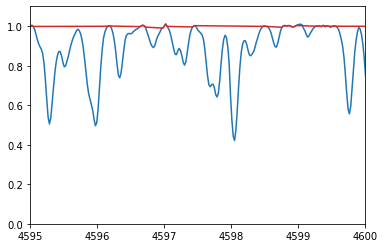

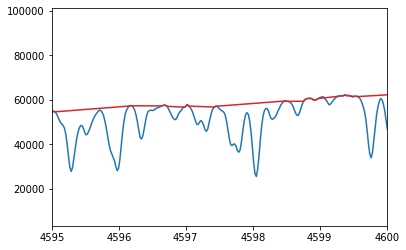

In [26]:
Sun.normalize(20, 1.0, 70, clip = [4598,4600])
plt.plot(Sun.wavelength[order],Sun.normalized_flux[order])
plt.plot(Sun.wavelength[order][Sun.continuum[order]],Sun.normalized_flux[order][Sun.continuum[order]], color = 'tab:red')
plt.ylim([0,1.1])
plt.xlim([4595,4600])
plt.show()

plt.plot(Sun.wavelength[order],Sun.flux[order])
plt.plot(Sun.wavelength[order][Sun.continuum[order]],Sun.flux[order][Sun.continuum[order]], color = 'tab:red')
#plt.ylim([0,1.1])
plt.xlim([4595,4600])
plt.show()

(4595, 4600)

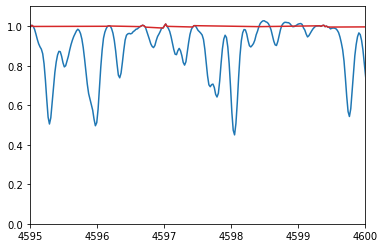

In [7]:
order = 20
plt.plot(Sun.wavelength[order],Sun.normalized_flux[order])
plt.plot(Sun.wavelength[order][Sun.continuum[order]],Sun.normalized_flux[order][Sun.continuum[order]], color = 'tab:red')
plt.ylim([0,1.1])
plt.xlim([4595,4600])

In [8]:
Sun.save_normalized('sun_save_test')

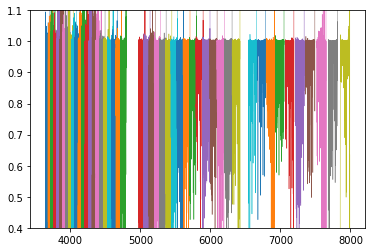

In [9]:
Sun.check_spectra()

/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:113: RuntimeWarning: divide by zero encountered in true_divide
  return self.flux[order]/self.obs_err[order]


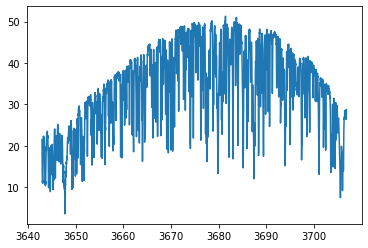

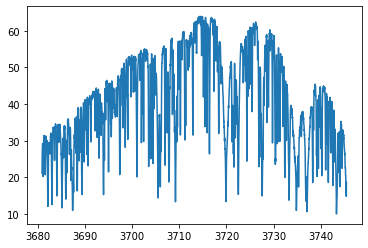

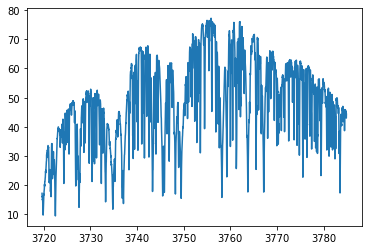

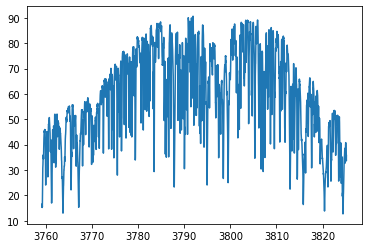

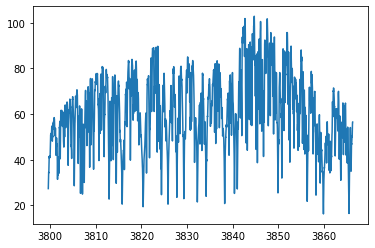

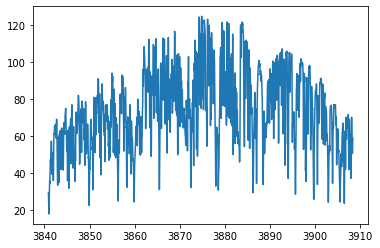

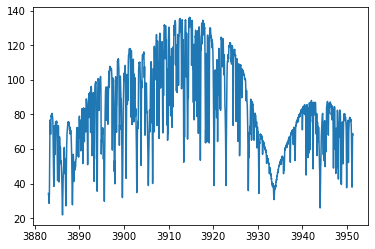

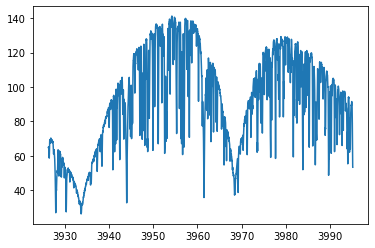

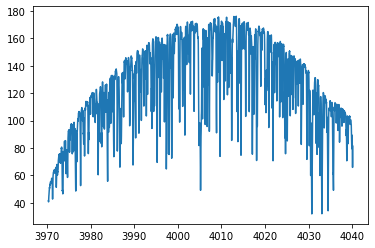

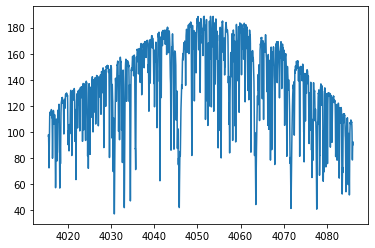

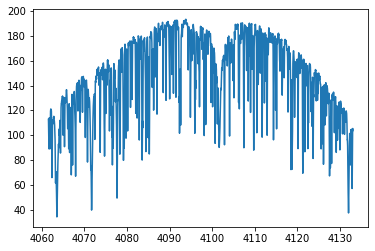

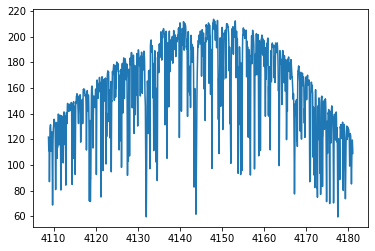

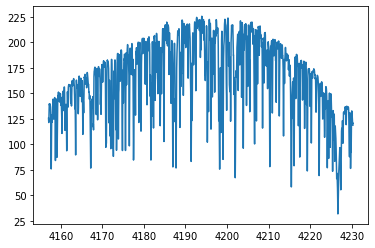

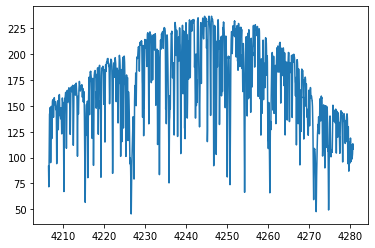

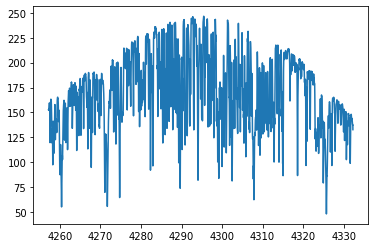

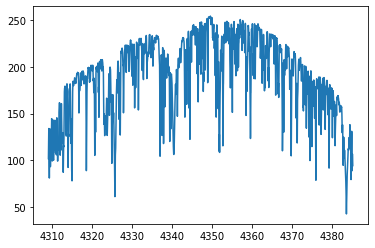

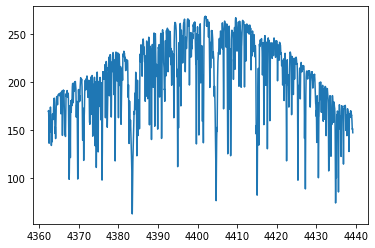

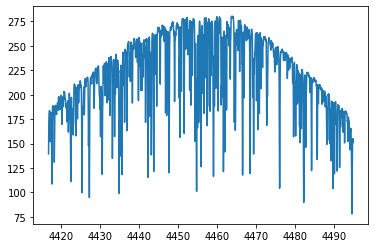

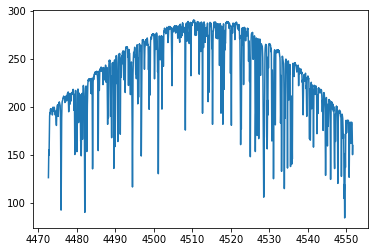

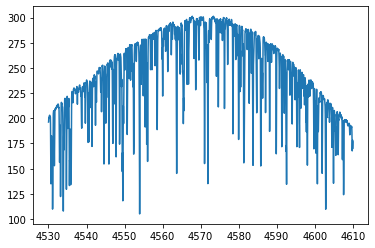

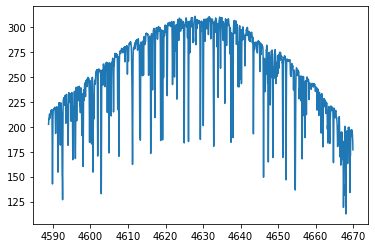

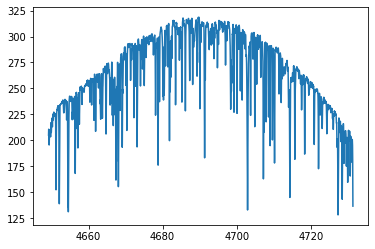

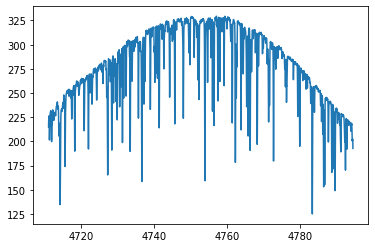

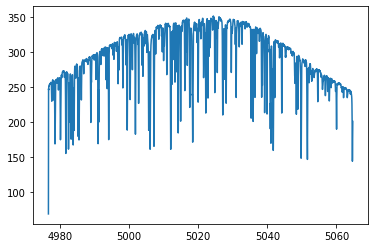

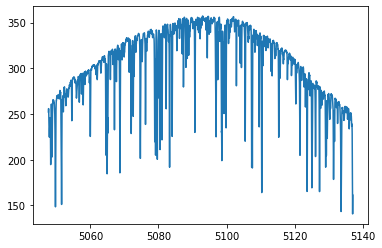

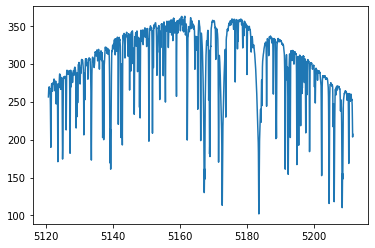

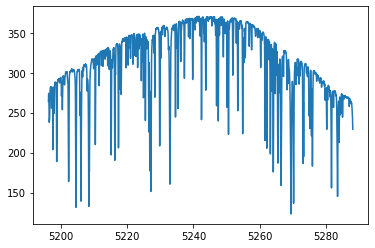

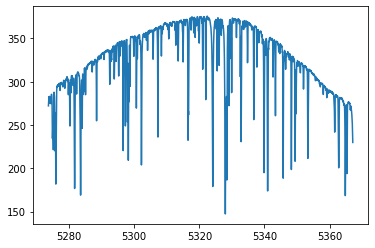

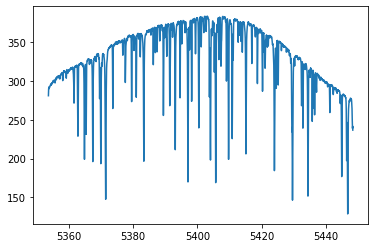

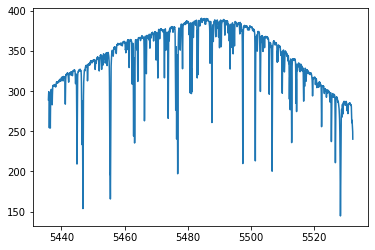

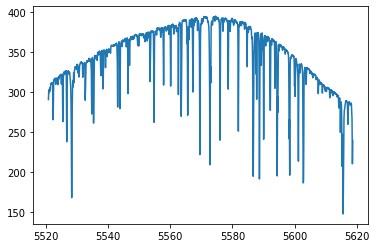

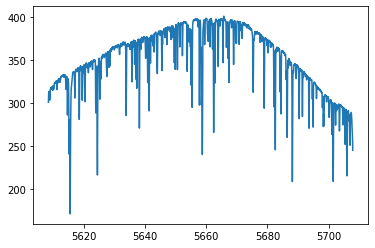

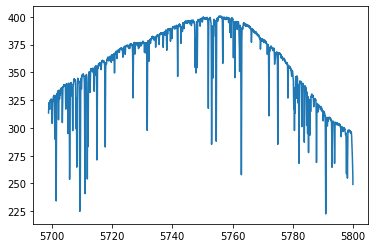

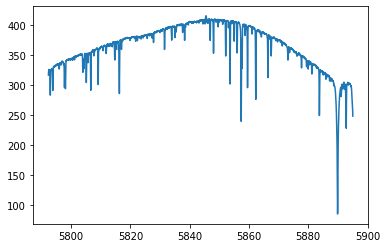

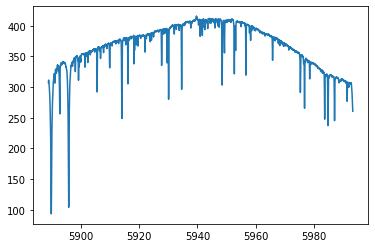

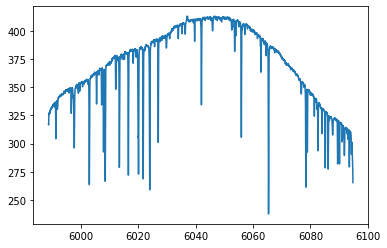

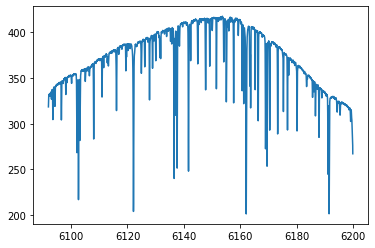

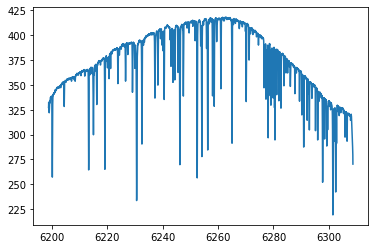

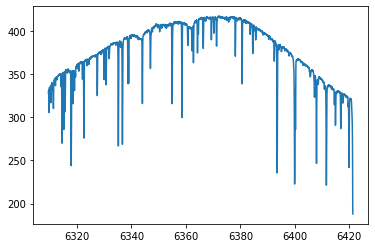

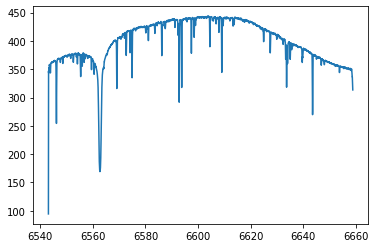

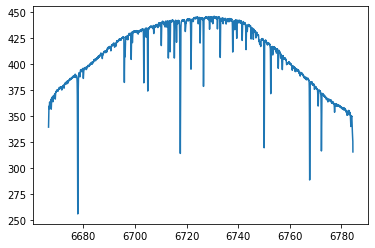

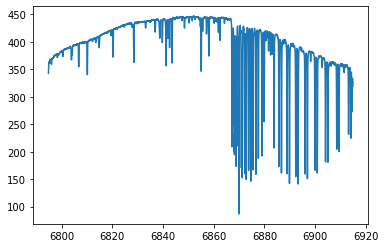

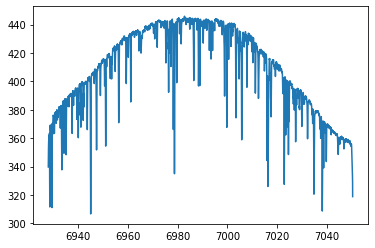

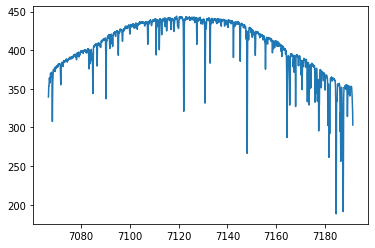

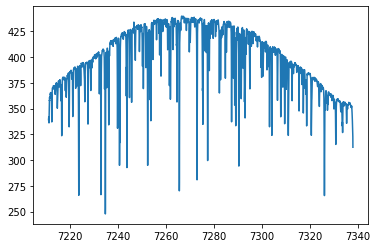

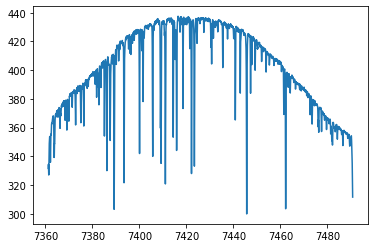

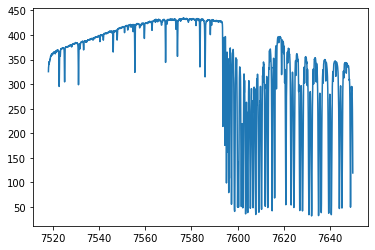

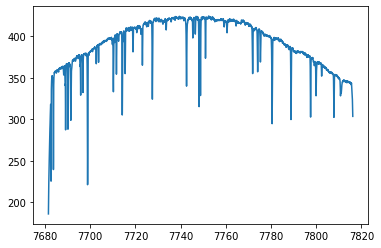

/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:113: RuntimeWarning: invalid value encountered in true_divide
  return self.flux[order]/self.obs_err[order]


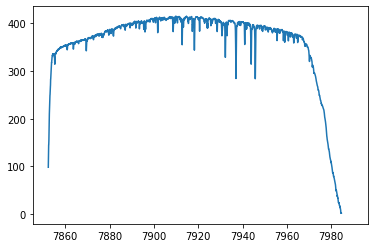

In [10]:
for i in range(len(Sun.flux)):
    plt.plot(Sun.wavelength[i],Sun.S_N(i))
    plt.show()


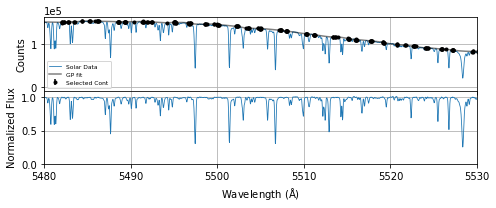

In [11]:
order = 29
xlims = [5480,5530]
ylims = [0,1.1]
fig = plt.figure(figsize=(7,3))
#fig = plt.figure(figsize=(10,5))
counts = fig.add_subplot(211)
counts.plot(Sun.wavelength[order],Sun.flux[order], lw = 0.8, label = 'Solar Data')
counts.plot(Sun.wavelength[order],Sun.pred_all[order], 'k',alpha = 0.5, label = 'GP fit')
# counts.fill_between(Sun.wavelength[order],Sun.m_all[order]+2*np.sqrt(np.diag(Sun.C_all[order])),
#                  Sun.m_all[order]-2*np.sqrt(np.diag(Sun.C_all[order])),color='k',alpha=0.2)
counts.errorbar(Sun.wavelength[order][Sun.continuum[order]],Sun.flux[order][Sun.continuum[order]],
             yerr=Sun.obs_err[order][Sun.continuum[order]],capsize=0,fmt='k.', label = 'Selected Cont')
counts.set_ylabel('Counts')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
counts.set_xlim(xlims)
counts.set_xticklabels([])
counts.legend(loc='best', prop={'size': 6})
counts.grid()

norm = fig.add_subplot(212)
#norm.errorbar(Sun.wavelength[order],Sun.normalized_flux[order],yerr=Sun.obs_err[order]/Sun.m_all[order])
norm.plot(Sun.wavelength[order],Sun.normalized_flux[order], lw = 0.8, label = 'Solar Data')
norm.set_ylabel('Normalized Flux')
norm.set_xlabel(r'$\rm Wavelength~(\AA)$')
norm.set_xlim(xlims)
norm.set_ylim(ylims)
norm.grid()

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
#plt.savefig('Cont_norm_sample.pdf')


In [12]:
%%time
#linelist_path = '/Users/georgevejar/Documents/GitHub/Spectrum_project/Sun_ew_test1.txt'
linelist_path = '/Users/georgevejar/Documents/GitHub/Spectrum_project/linelist_fe_sun_original.txt'
lines = np.genfromtxt(linelist_path, skip_header = 1, usecols = 0)
elmnt = np.genfromtxt(linelist_path, skip_header = 1, usecols = 1)
EP = np.genfromtxt(linelist_path, skip_header = 1, usecols = 2)
OS = np.genfromtxt(linelist_path, skip_header = 1, usecols = 3)
ex = np.genfromtxt(linelist_path, skip_header = 1, usecols = 4)
ews = np.genfromtxt(linelist_path, skip_header = 1, usecols = 5)

#Load lines into class
Sun.load_lines(linelist_path)

CPU times: user 6.88 ms, sys: 2.8 ms, total: 9.68 ms
Wall time: 12.4 ms


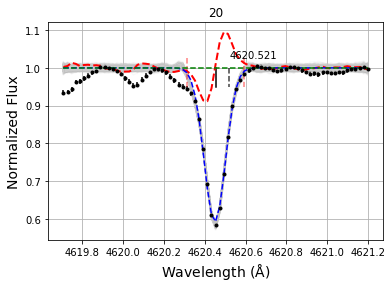

53.31 0.52


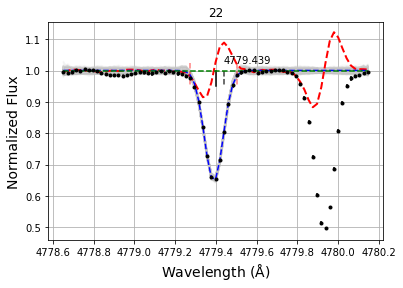

40.62 0.52


/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


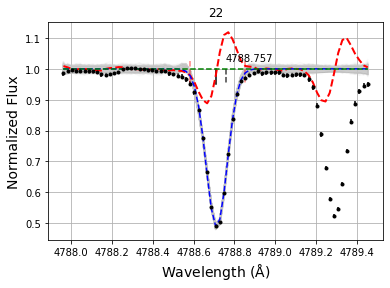

66.63 0.6


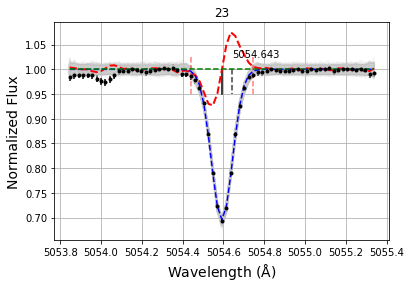

39.33 0.6


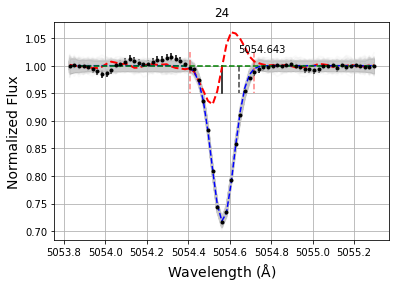

38.32 0.59


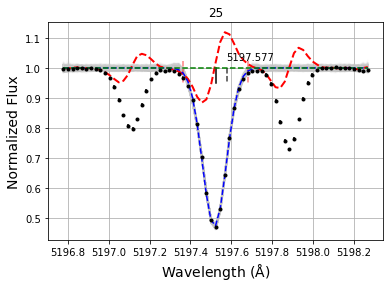

77.37 0.56


/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_func.py:157: RuntimeWarning: invalid value encountered in sqrt
  return bf, np.sqrt(np.diag(cov)), p0


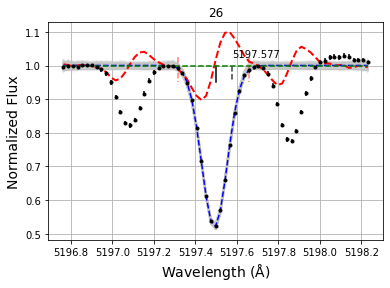

74.49 3.28


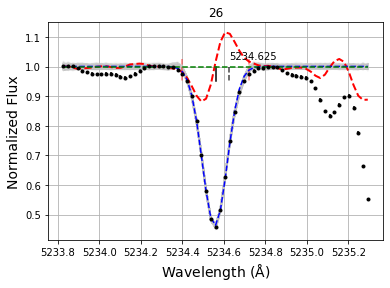

80.85 0.46


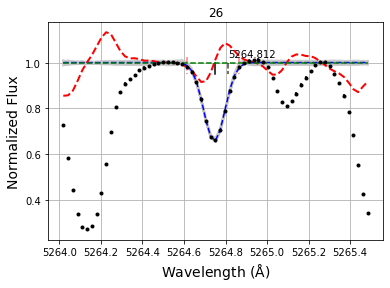

44.13 0.43


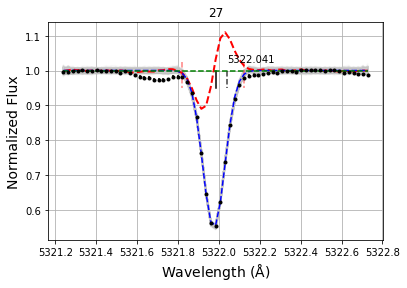

61.28 0.45


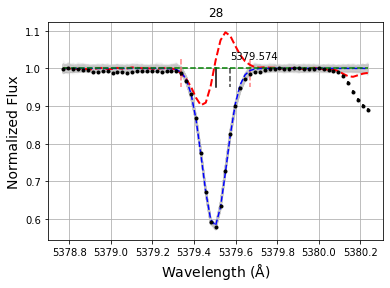

61.5 0.46


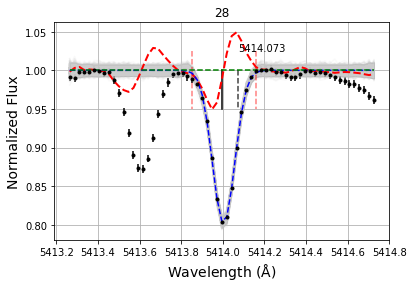

26.68 0.45


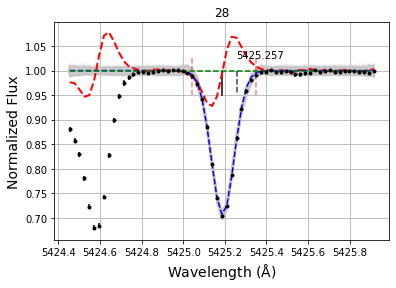

40.56 0.47


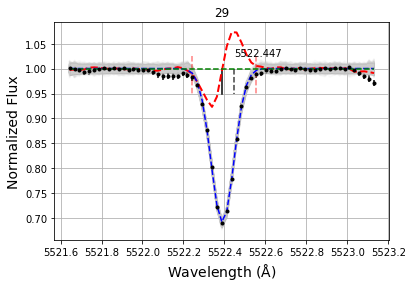

43.12 0.57


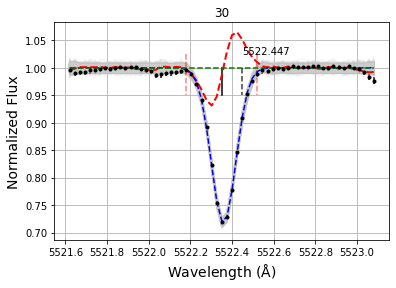

42.02 0.67


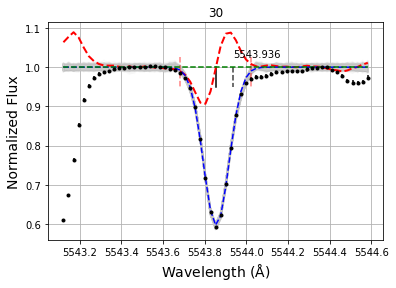

62.0 0.49


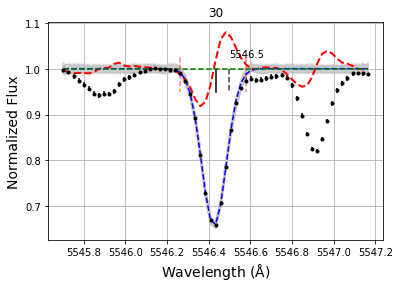

51.02 0.5


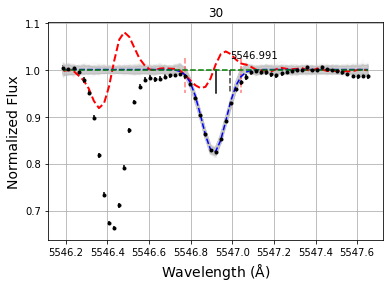

25.96 0.51
extra params: [0.005, 0, 0, 0]


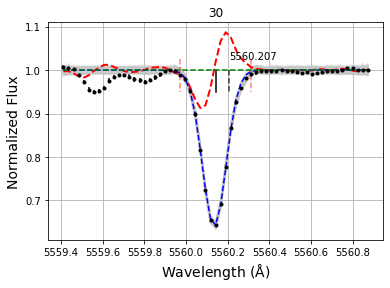

51.75 0.46


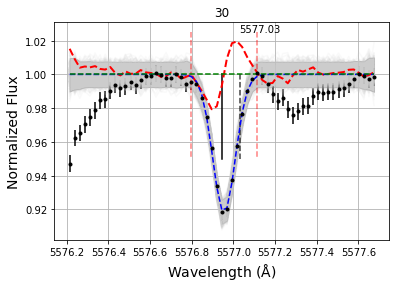

11.15 0.48


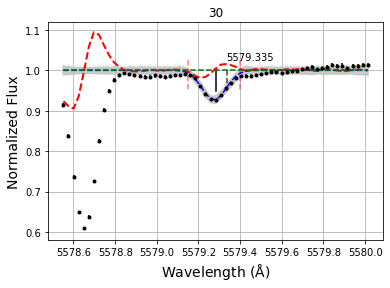

10.63 0.45
extra params: [0.01, 5579.15, 5579.4, 0]


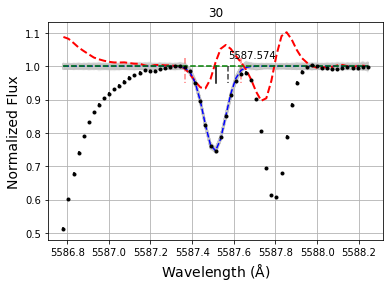

32.97 0.44


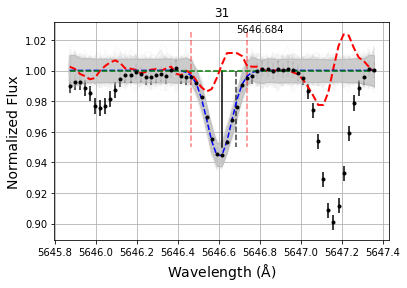

8.23 0.54


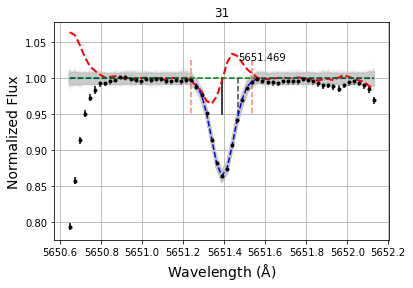

18.5 0.44


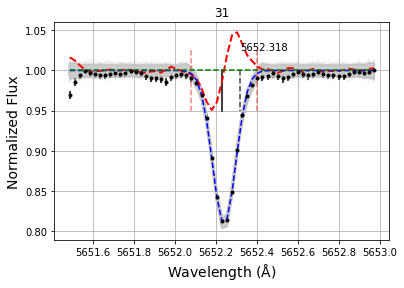

27.25 0.49


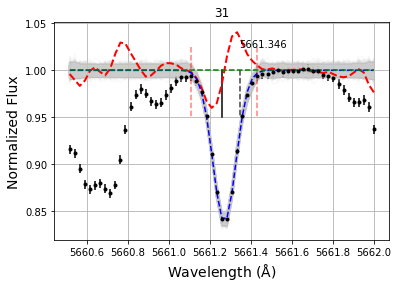

22.87 0.47


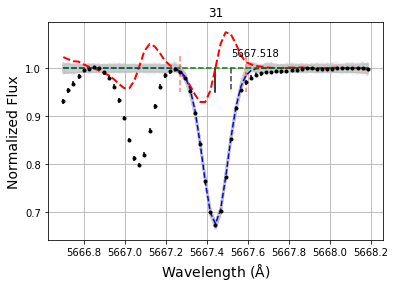

49.63 0.5


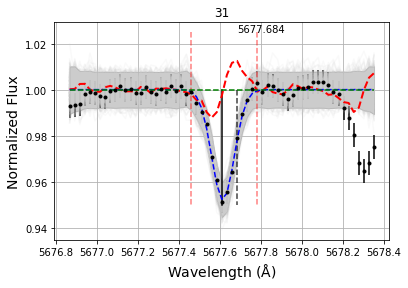

6.6 0.49


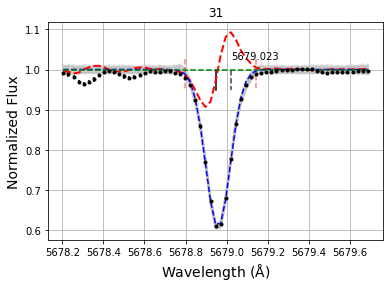

59.22 0.46


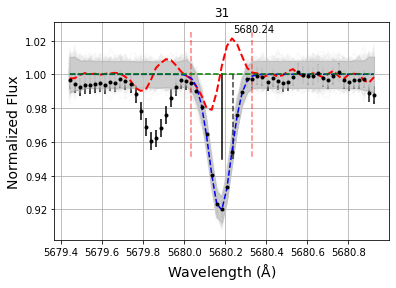

10.77 0.49


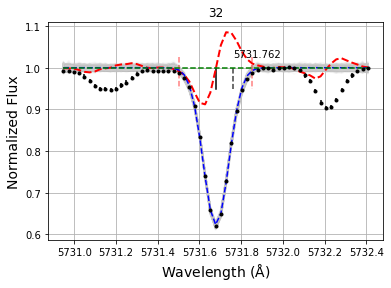

57.76 0.47


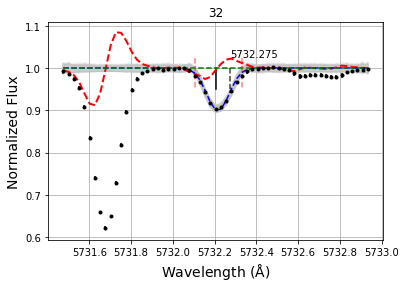

13.73 0.46


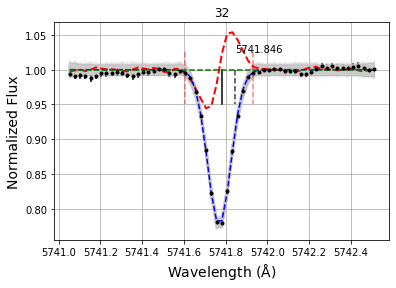

31.33 0.46


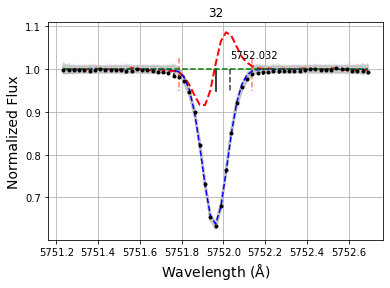

54.77 0.47


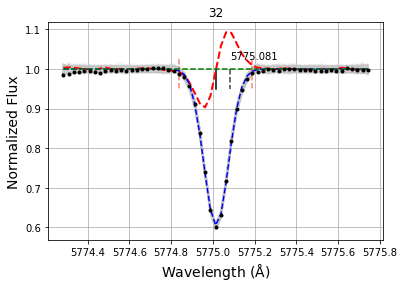

58.66 0.49


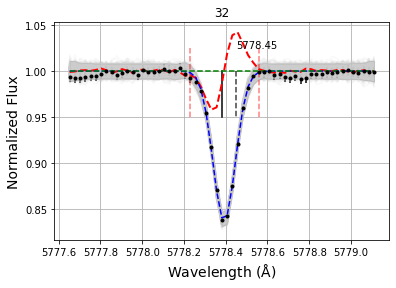

21.99 0.5


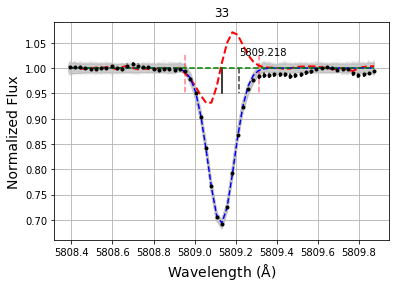

49.06 0.59


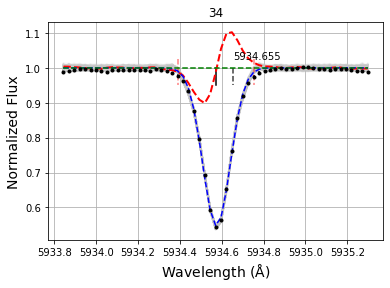

75.17 0.51


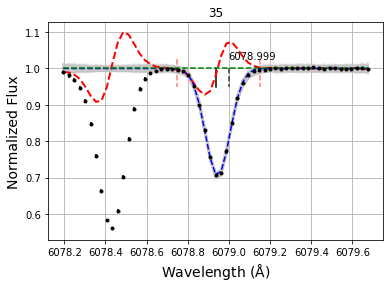

44.34 0.55
extra params: [0, 6078.75, 6079.15, 0]


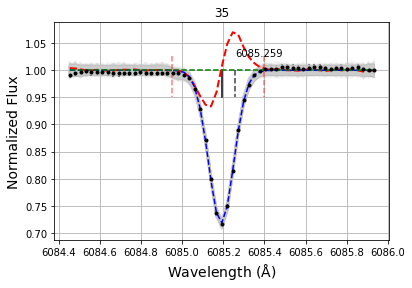

43.12 0.6
extra params: [-0.005, 6084.95, 6085.4, 0]


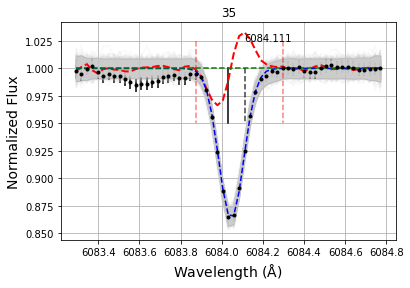

20.86 1.05
extra params: [0, 0, 6084.3, 0]


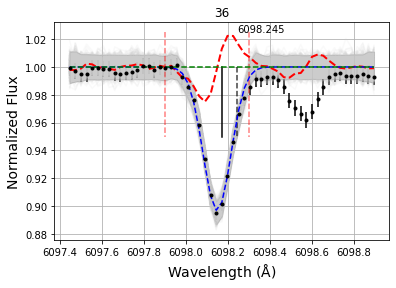

17.19 0.69
extra params: [0, 6097.9, 6098.3, 0]


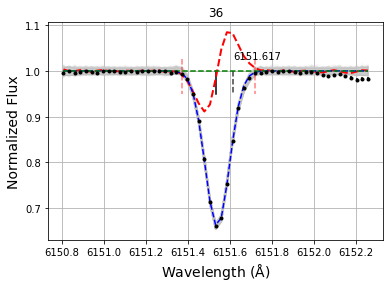

49.68 0.45


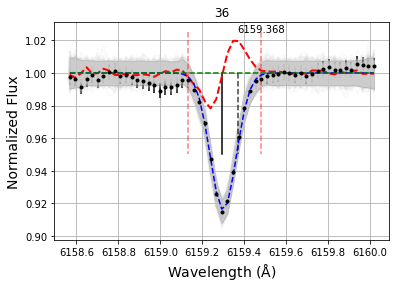

13.11 0.63


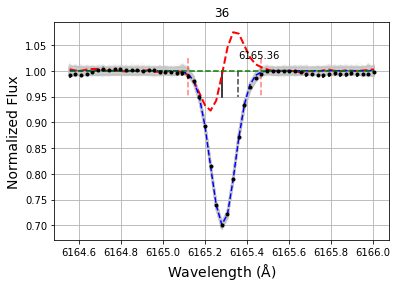

44.42 0.46


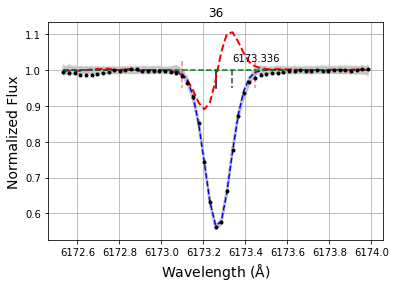

68.05 3.04


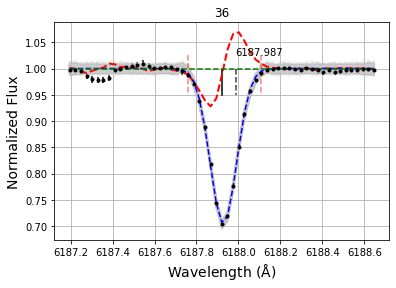

46.96 0.62


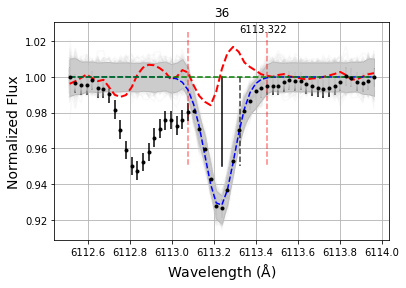

12.77 0.76
extra params: [0, 0, 6113.45, 0]


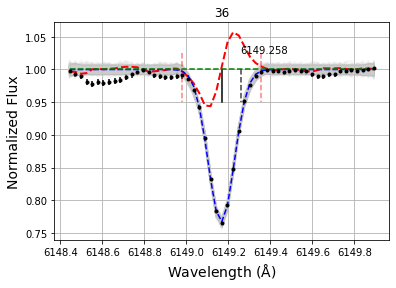

36.44 0.51


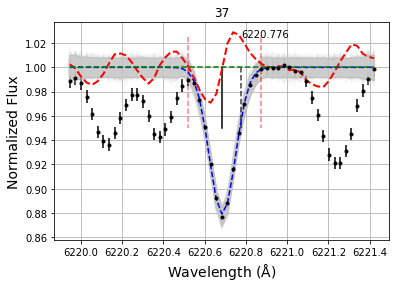

19.22 0.57


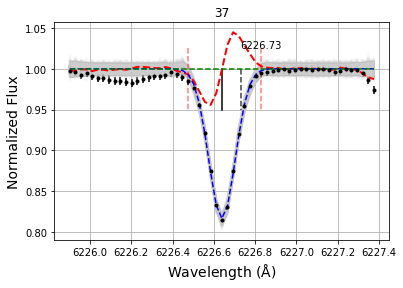

29.51 0.57


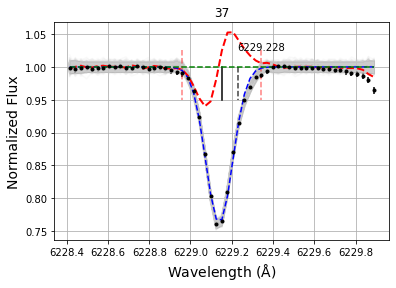

38.84 0.54


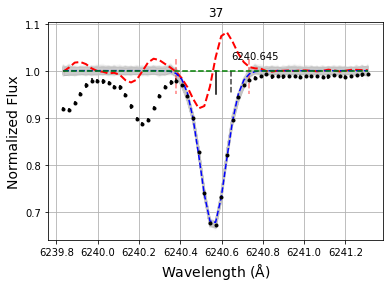

52.01 0.47


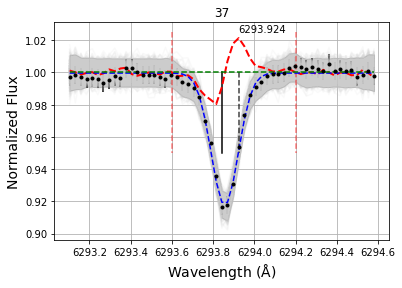

13.51 0.66
extra params: [0, 6293.6, 6294.2, 0]


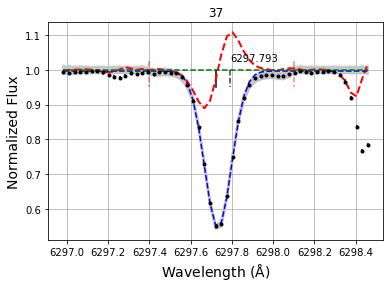

74.16 0.63
extra params: [-0.005, 6297.4, 6298.1, 0]


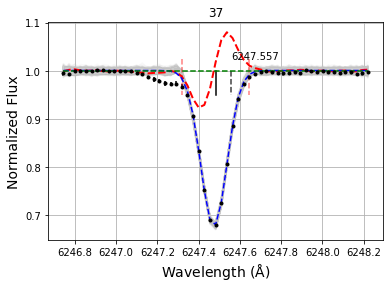

51.42 0.49


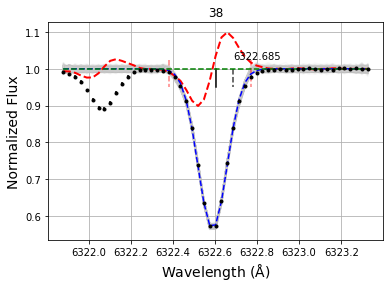

75.61 0.57


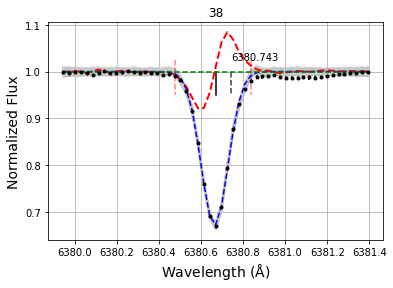

52.94 0.52


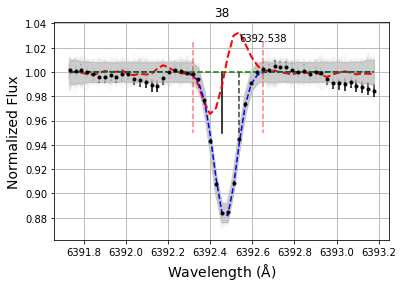

16.69 0.53


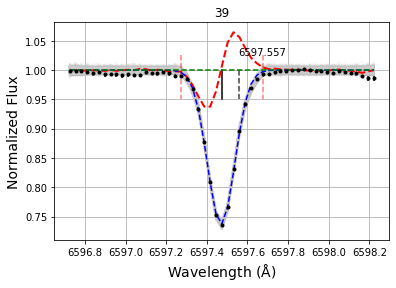

44.43 0.48


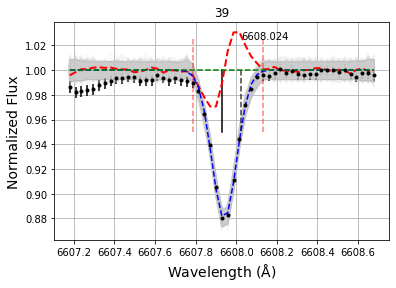

18.45 0.48


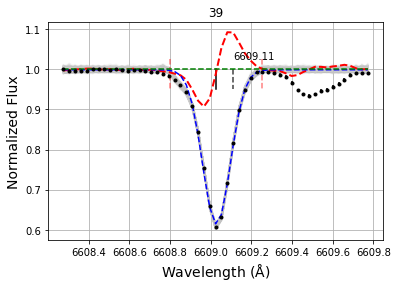

66.34 0.52
extra params: [0, 6608.8, 6609.25, 0]


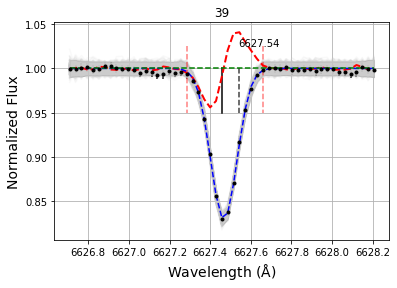

27.76 0.54


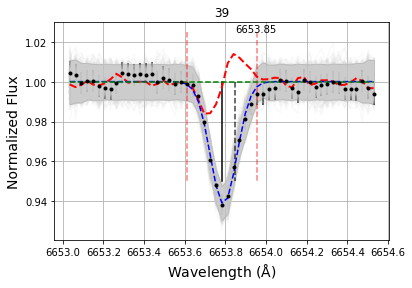

10.04 0.64


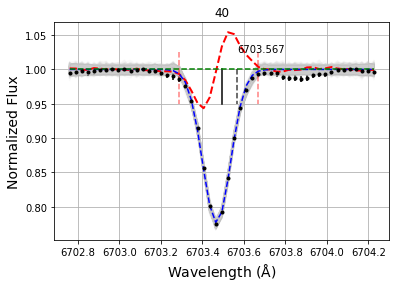

37.81 0.52


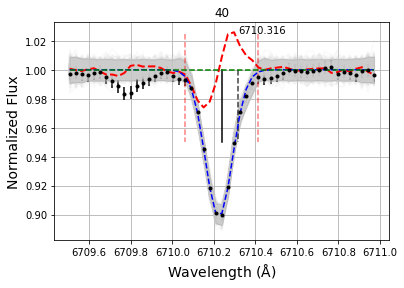

16.68 0.51


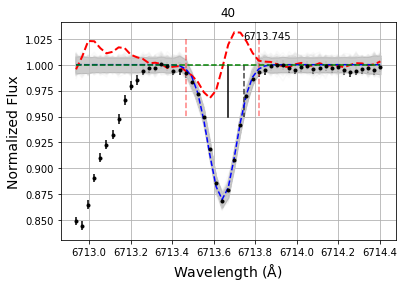

21.8 0.94


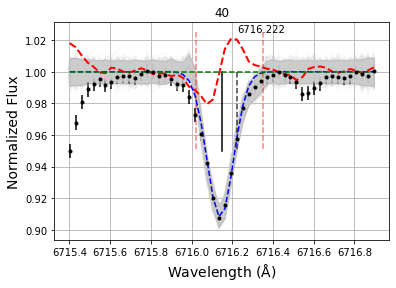

15.01 0.5
extra params: [0, 6716.02, 6716.35, 6716.15]


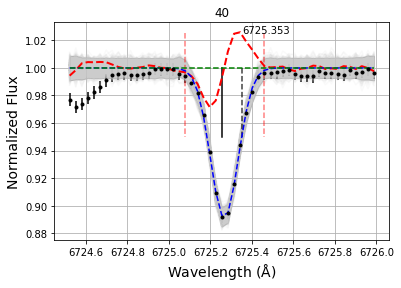

18.24 0.52


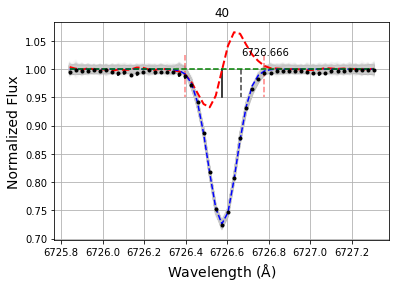

46.93 0.52


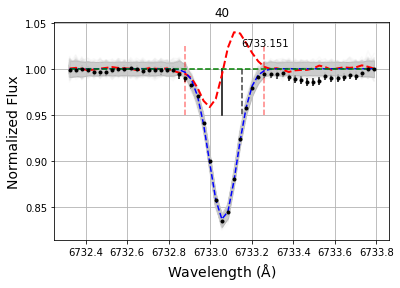

27.55 0.53


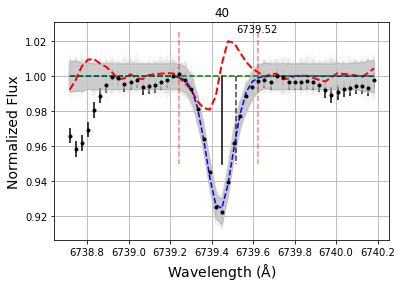

11.93 0.5


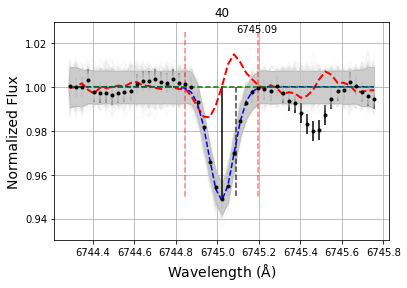

7.65 0.51


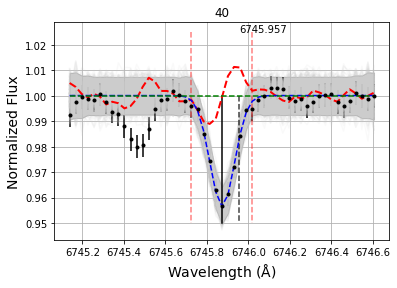

6.46 0.5


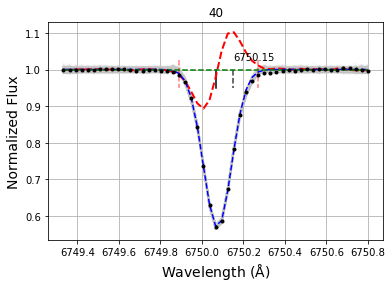

73.77 3.25


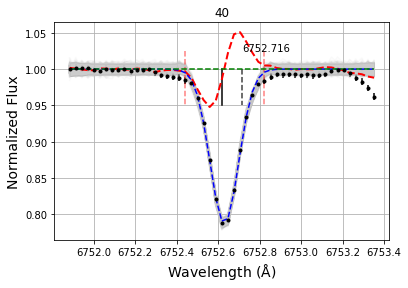

36.67 2.23


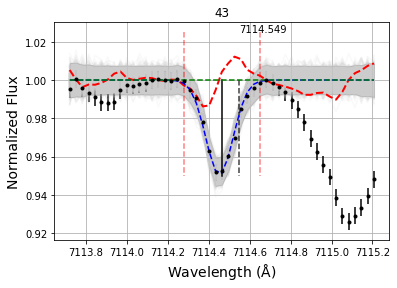

8.31 0.54


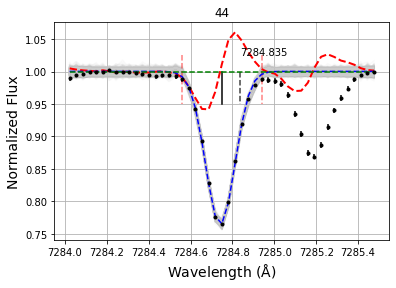

41.55 0.54


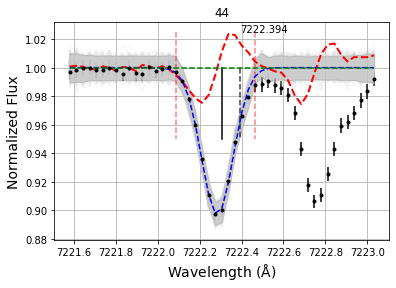

19.64 0.64


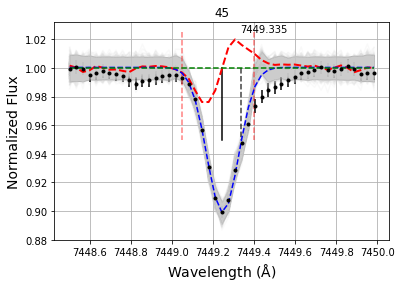

19.73 0.58
extra params: [0, 0, 7449.4, 0]


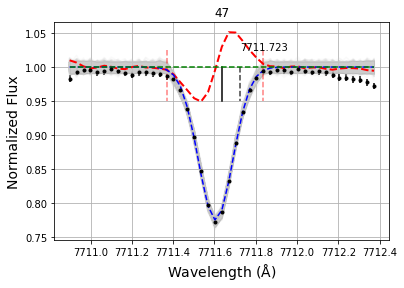

47.32 0.7
extra params: [-0.005, 0, 0, 0]


In [13]:
plot_lines = Sun.lines
ex_params = {6098.245:[0,6097.9,6098.3,0],
             6113.322:[0,0,6113.45,0],
             6293.924:[0,6293.6,6294.2,0],
             6716.222:[0,6716.02,6716.35,6716.15],
             7449.335:[0,0,7449.4,0],
             5546.991:[0.005,0,0,0],
             5579.335:[0.01,5579.15,5579.4,0],
             6078.999:[0,6078.75,6079.15,0],
             6085.259:[-0.005,6084.95,6085.4,0],
             6297.793:[-0.005,6297.4,6298.1,0],
             6609.11:[0,6608.8,6609.25,0],
             6084.111:[0,0,6084.3,0],
             7711.723:[-0.005,0,0,0]}

#ex_params = {}

exclude_lines = np.array([])
Sun.measure_all_ew(exclude_lines = exclude_lines, plot_lines = plot_lines, ex_params = ex_params)

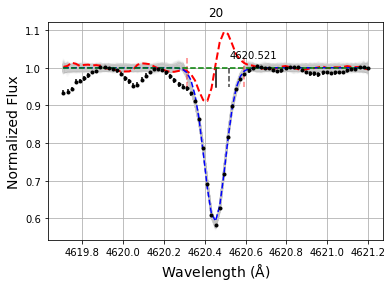

53.3 0.49


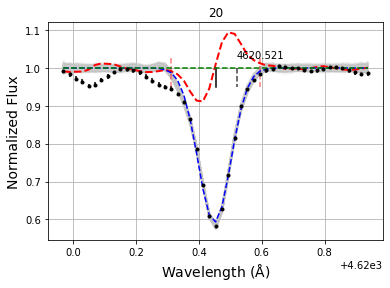

53.22 0.59


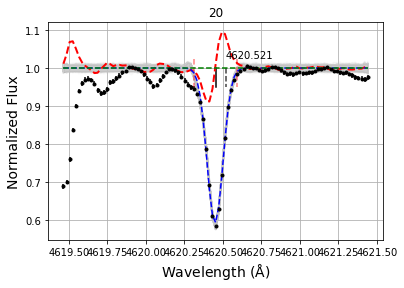

53.33 0.49


In [14]:
Sun.measure_line_ew(4620.521)
Sun.measure_line_ew(4620.521, window_size = 1.0)
Sun.measure_line_ew(4620.521, window_size = 2.0)

In [33]:
Sun.check_for_flags()

4788.757 might have a bad fit 0.0016236105754257168
5934.655 might have a bad fit 0.001023494380796677
6297.793 might have a bad fit 0.0016454390939291822
6609.11 might have a bad fit 0.0018175440419282267
4620.521 might have a bad fit 0.0026918343308721215
5234.625 might have a bad fit 0.001101056880752347


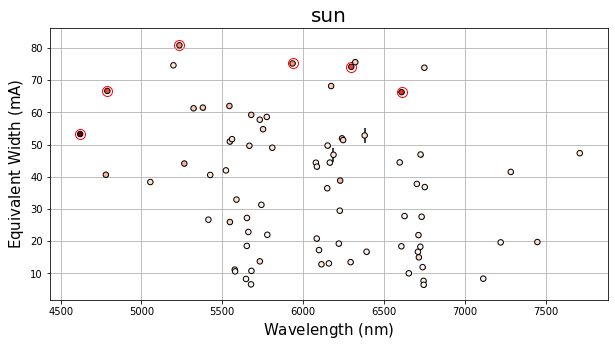

In [34]:
plot_line_info(Sun, "sun")

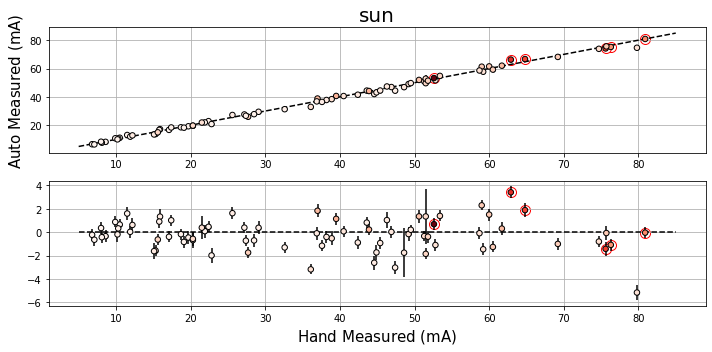

In [35]:
plot_comparison_res(Sun, ews, 'sun', xy = [5,85])

In [15]:
#linelist_path = '/Users/georgevejar/Documents/Github/Spectrum_project/abunds_tests/Pr0201/re_sorted_linelist_mod_sun.txt'
#linelist_path = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/sun/re_sorted_linlist_mod.txt'
linelist_path = '/Users/georgevejar/Documents/Github/Spectrum_project/abunds_tests/Pr0201/Sun_ele_test2.txt'
lines = np.genfromtxt(linelist_path, skip_header = 1, usecols = 0)
elmnt = np.genfromtxt(linelist_path, skip_header = 1, usecols = 1)
EP = np.genfromtxt(linelist_path, skip_header = 1, usecols = 2)
OS = np.genfromtxt(linelist_path, skip_header = 1, usecols = 3)
ex = np.genfromtxt(linelist_path, skip_header = 1, usecols = 4)
ews = np.genfromtxt(linelist_path, skip_header = 1, usecols = 5)

#Load lines into class
Sun.load_lines(linelist_path)

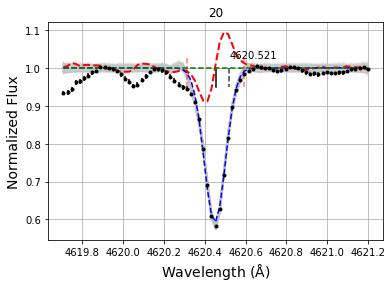

53.36 0.49


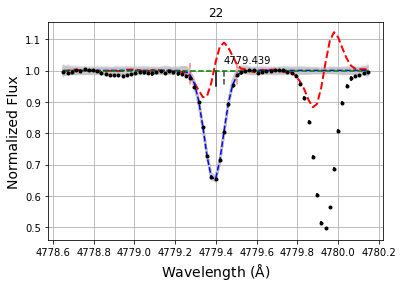

40.65 0.51


/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


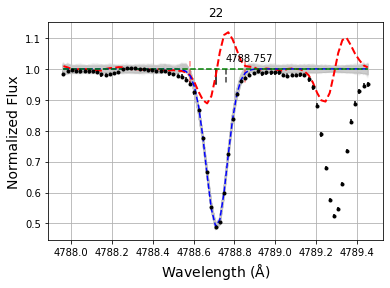

66.6 0.62


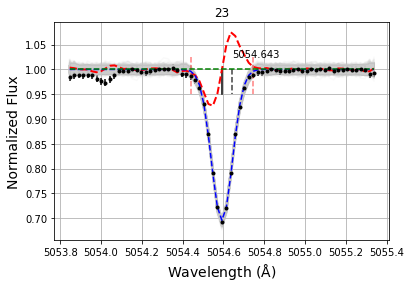

39.3 0.6


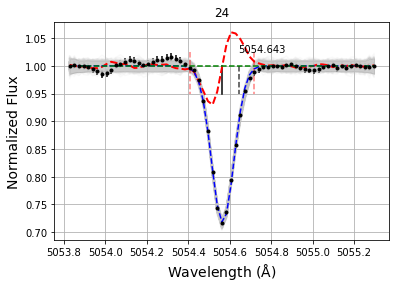

38.4 0.55


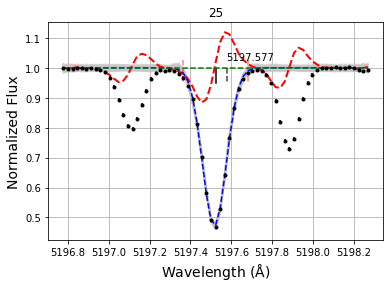

77.38 0.54


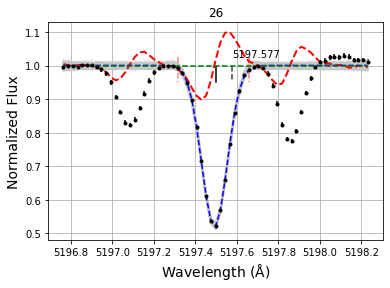

74.6 0.63


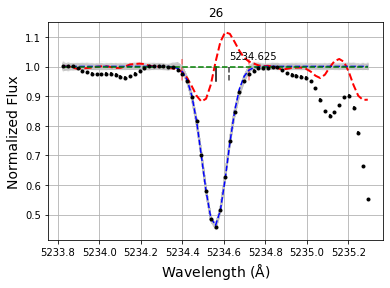

80.9 0.49


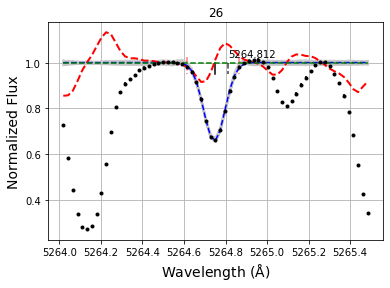

44.13 0.43


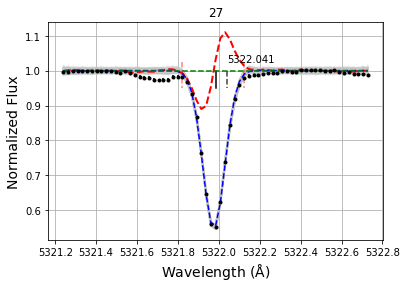

61.31 0.42


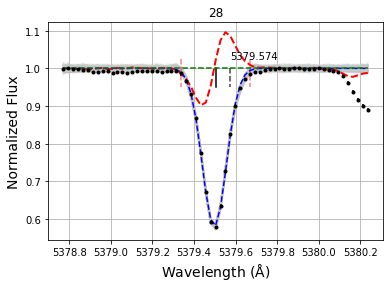

61.55 0.49


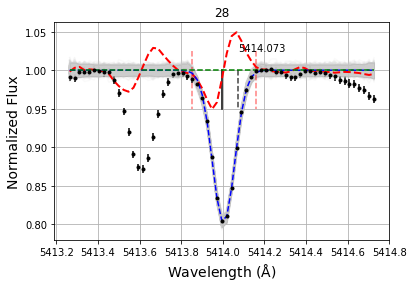

26.66 0.48


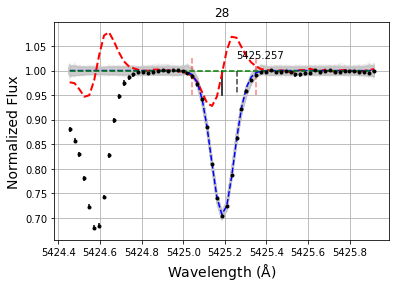

40.52 0.5


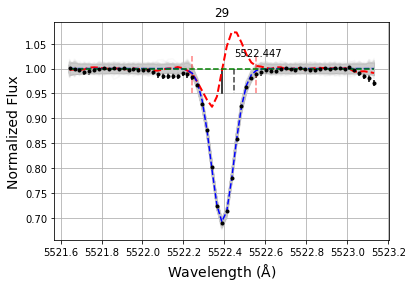

43.1 0.59


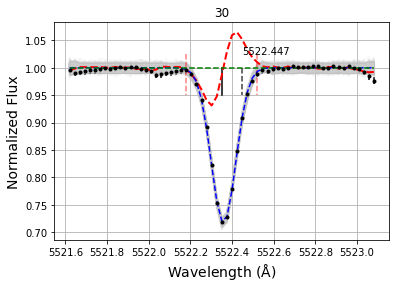

42.01 0.57


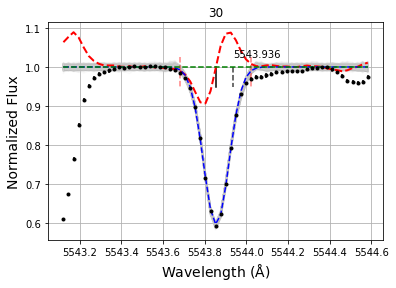

62.01 0.53


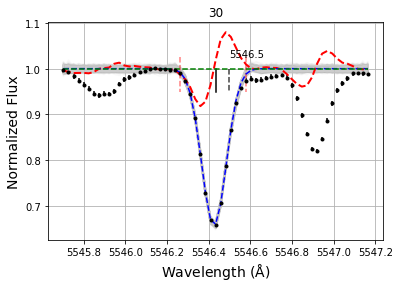

50.97 0.49


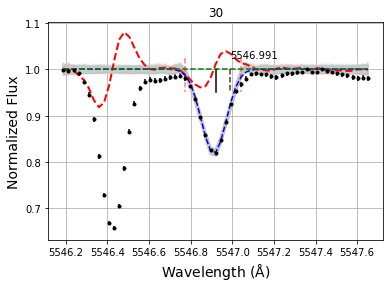

27.34 0.48


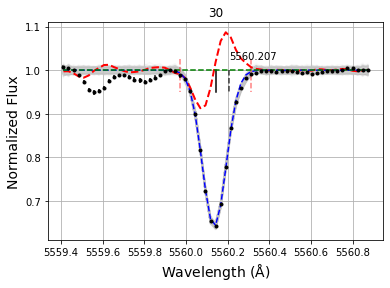

51.73 0.49


/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_func.py:157: RuntimeWarning: invalid value encountered in sqrt
  return bf, np.sqrt(np.diag(cov)), p0


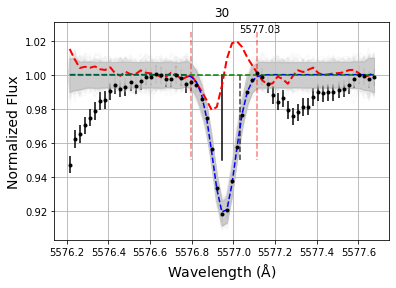

11.21 0.47


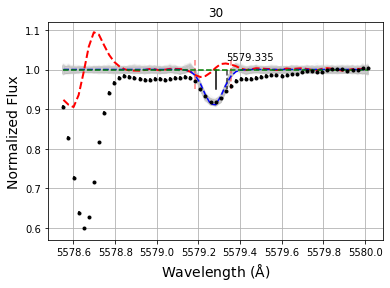

10.46 0.38


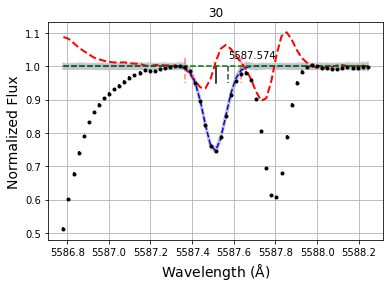

32.94 0.42


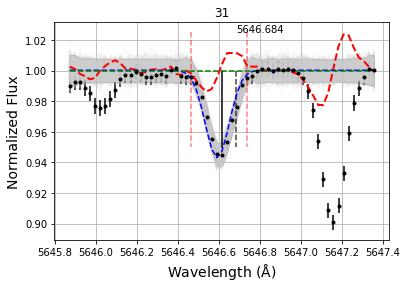

8.5 5.35


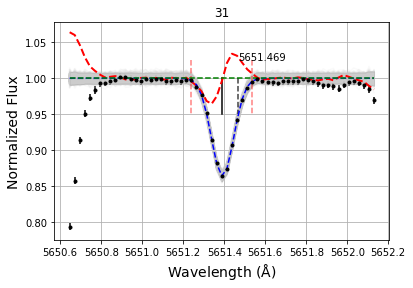

18.53 0.45


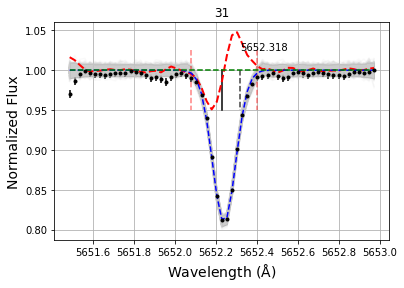

27.23 0.48


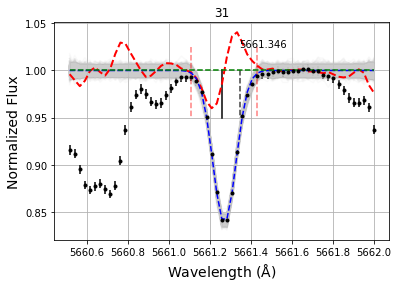

22.84 0.46


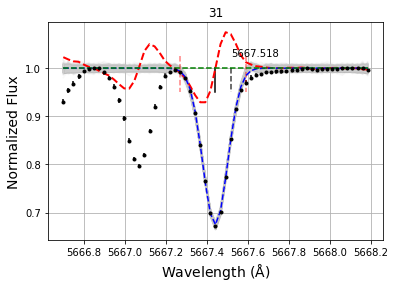

49.61 0.47


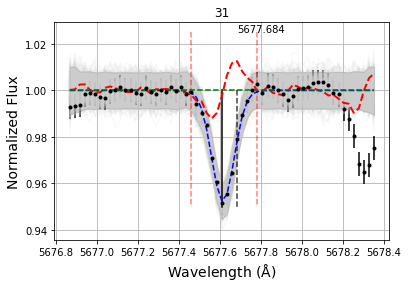

6.55 0.55


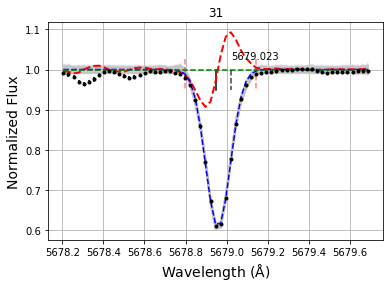

59.2 0.47


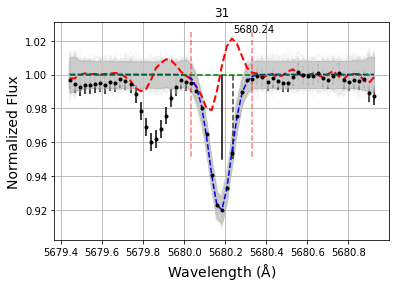

10.78 0.47


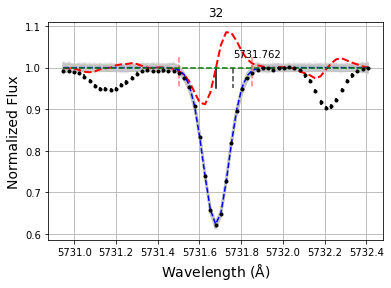

57.76 0.51


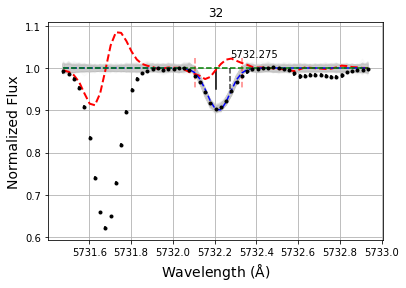

13.69 0.46


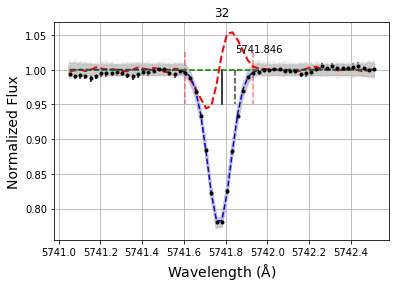

31.37 0.49


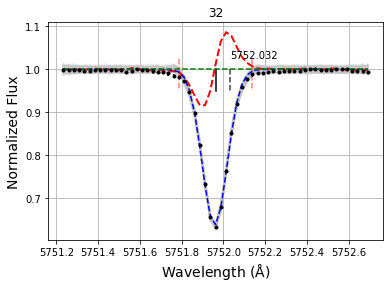

54.82 0.46


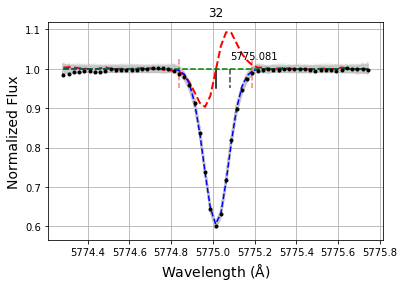

58.64 0.49


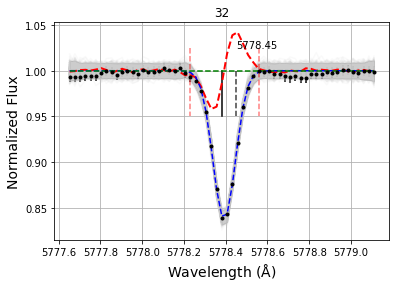

22.0 0.51


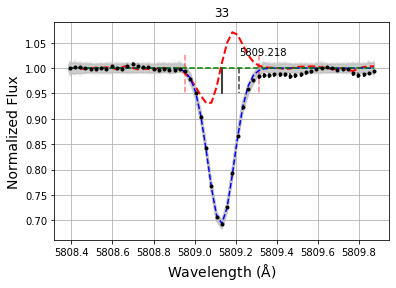

49.06 0.53


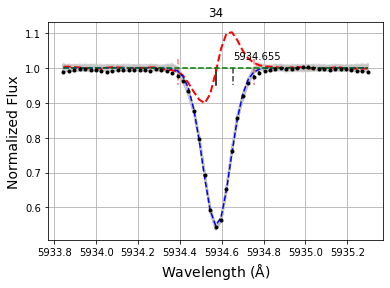

75.19 0.5


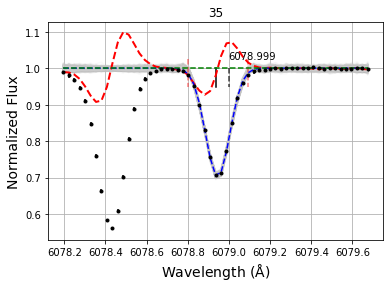

44.09 0.51


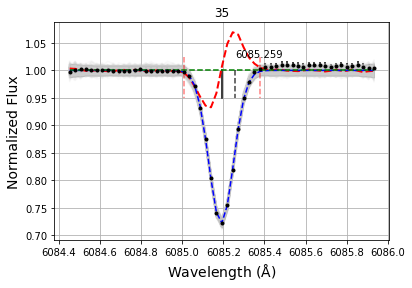

41.7 0.62


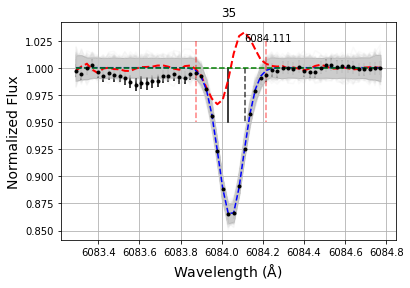

20.89 0.62


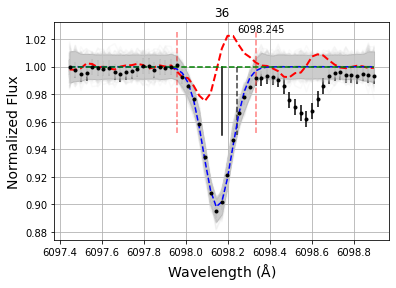

17.35 0.67


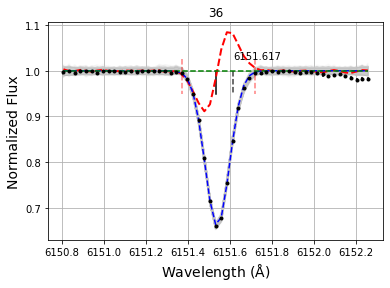

49.67 0.47


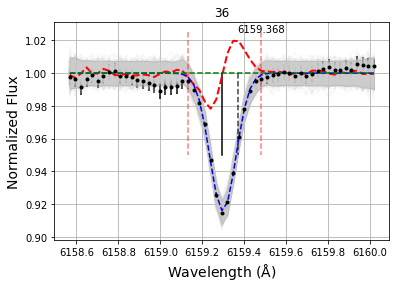

13.12 0.51


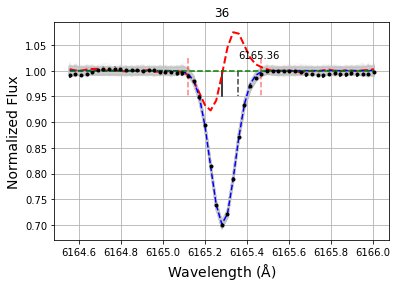

44.41 0.48


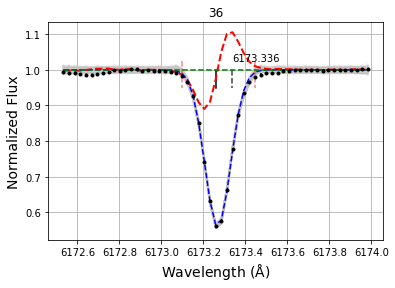

67.92 4.2


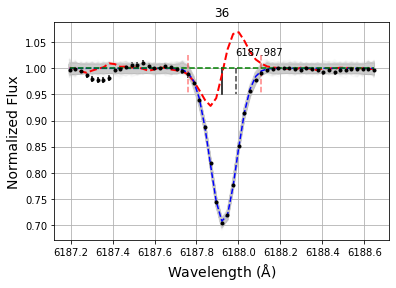

46.92 0.6


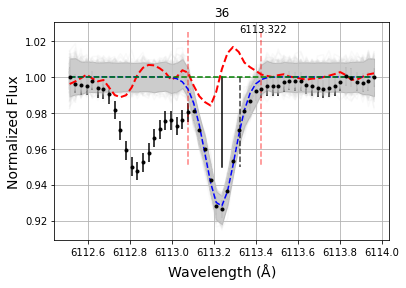

12.74 0.62


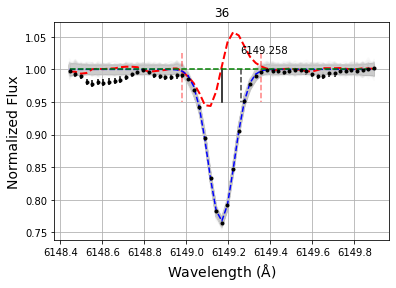

36.47 0.5


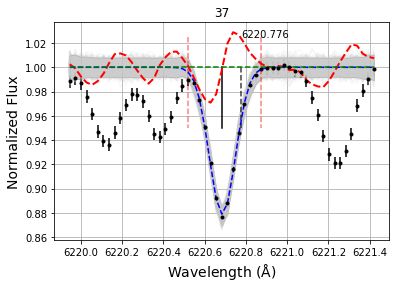

19.25 0.56


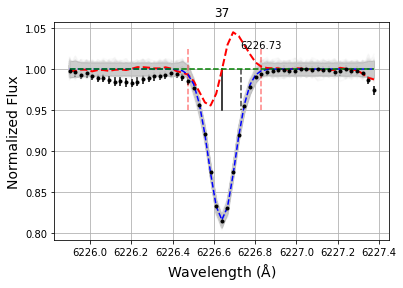

29.43 0.52


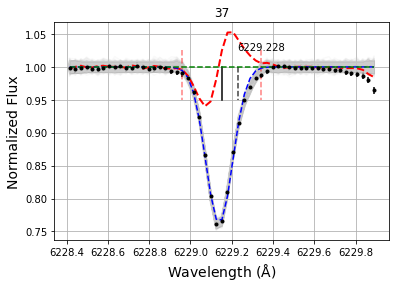

38.84 0.58


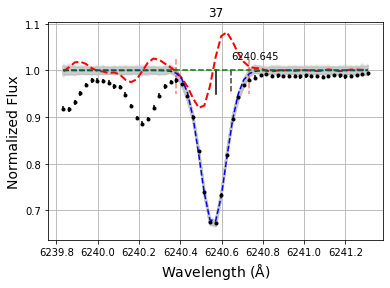

51.96 0.51


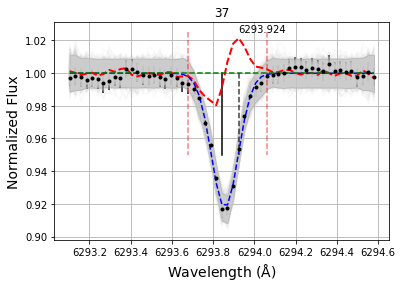

13.47 0.65


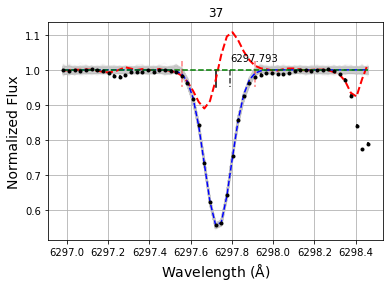

73.34 0.59


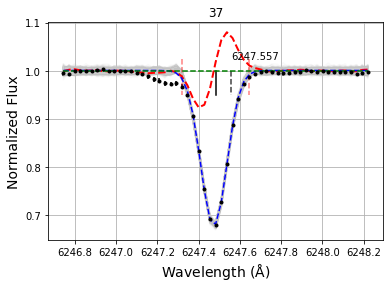

51.44 0.49


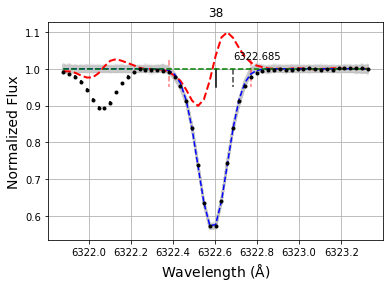

75.62 0.62


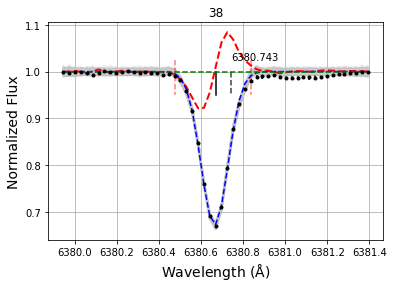

52.89 2.28


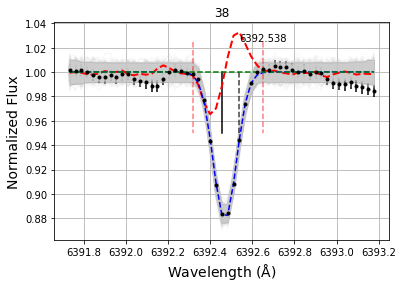

16.77 0.51


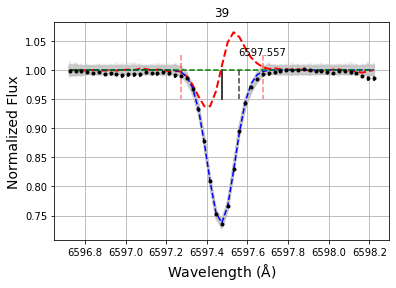

44.46 0.5


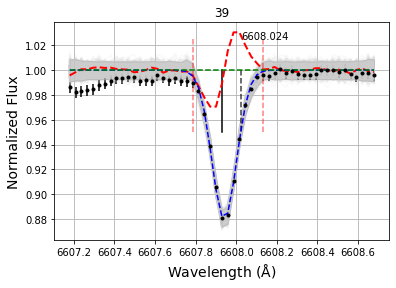

18.4 0.48


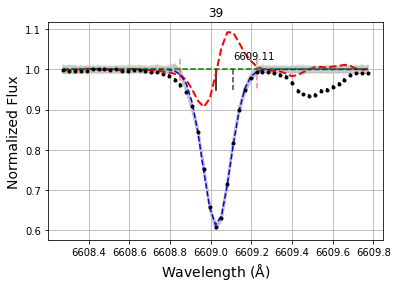

66.23 0.49


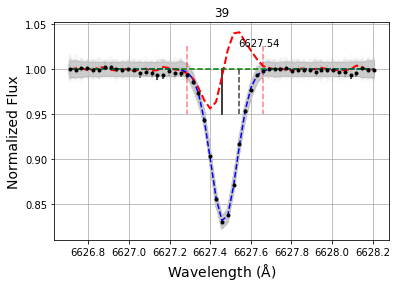

27.77 0.53


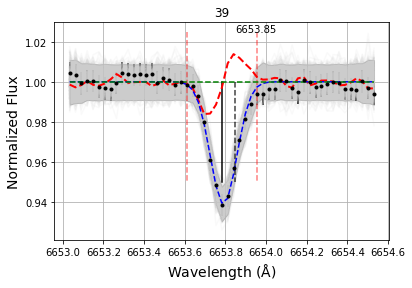

10.05 0.65


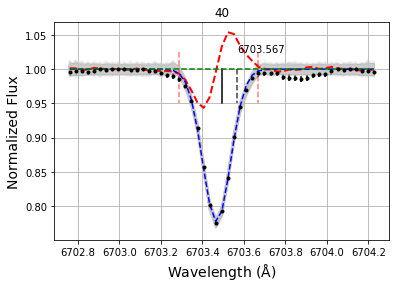

37.78 0.54


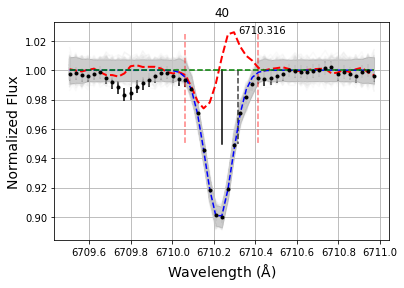

16.68 0.5


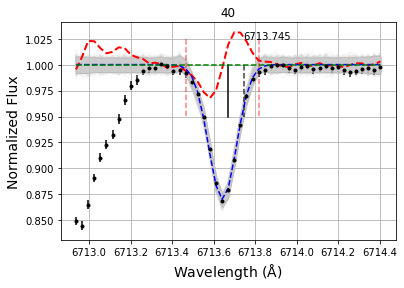

21.84 1.0


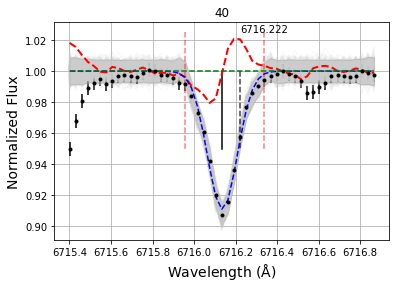

16.12 0.59


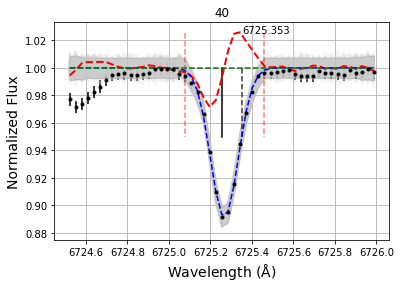

18.24 0.55


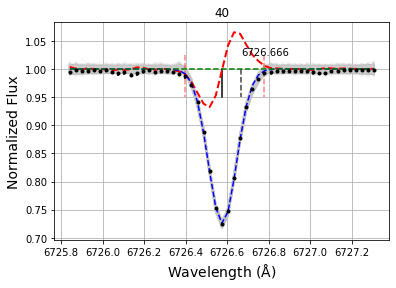

46.91 0.51


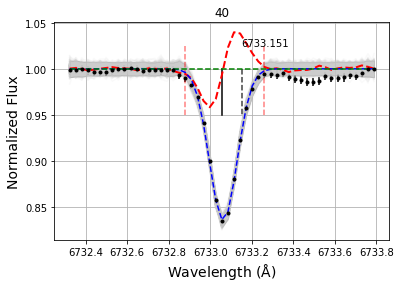

27.58 0.51


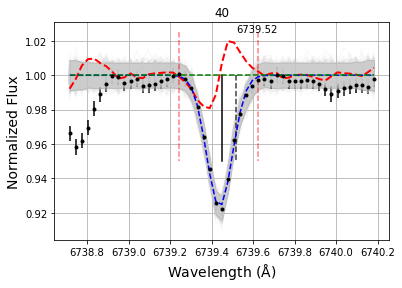

11.91 0.48


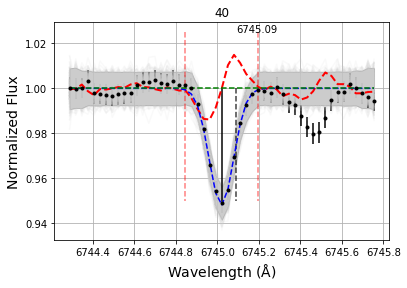

7.63 0.48


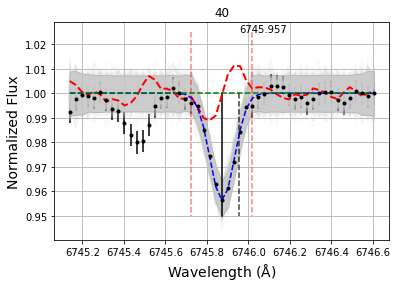

6.46 0.51


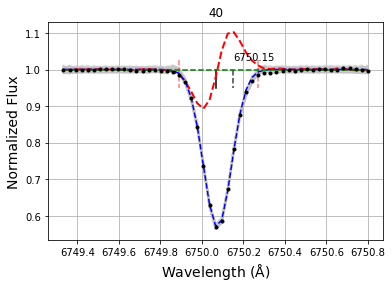

73.82 3.24


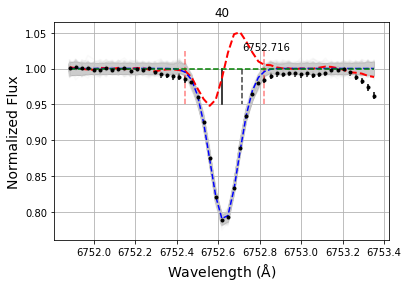

36.82 0.55


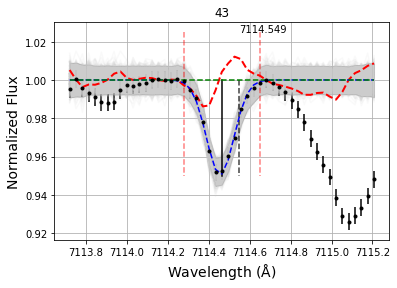

8.37 0.54


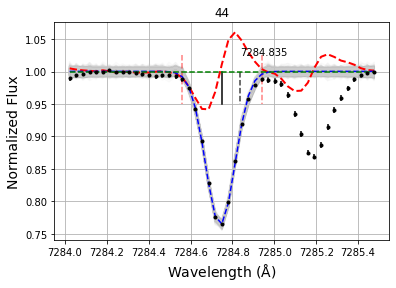

41.59 0.57


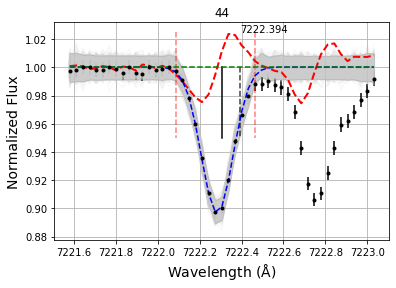

19.71 0.66


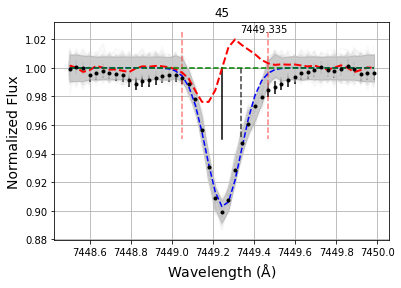

20.75 0.71


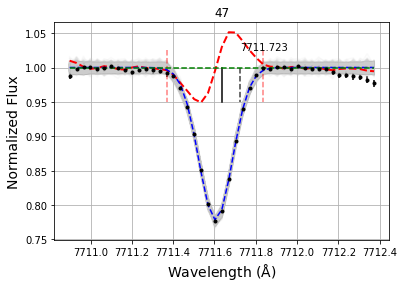

45.21 0.65


In [13]:
plot_lines = Sun.lines
ex_params = {4695.443:[0,0,4695.5,0],
             4722.153:[0,4721.8,4722.4,0],
             5052.167:[0,5051.95,5052.4,0],
             5380.337:[0,0,5380.4,0],
             5682.633:[0,5682.45,5682.8,0],
             6093.143:[0,6092.9,6093.3,0],
             6133.963:[-0.001,0,0,0],
             6300.304:[-0.005,0,6300.4,0],
             6244.466:[0,6244.25,6244.55,0],
             6224.529:[0.009,6224.2,6224.6,0],
             6414.98:[0,6414.75,6415.1,0],
             6741.628:[0,6741.4,6741.7,0],
             6757.171:[-0.005,6756.97,6757.4,0],
             #6965.409:[-0.005,6965.12,6965.6,0], line largely affected by other lines on both sides, high delavg
             7111.469:[0,7111.1,7111.5,7111.3],
             5846.986:[0.01,5846.78,5847.08,0],
             6243.815:[0.007,0,0,0],
             6243.105:[0.005,0,0,0],
             6320.851:[-0.005,0,0,0],
             7468.313:[-0.002,7468.0,7468.45,0],
             6841.19:[0.002,6841.13,6841.6,0],
             5708.4:[0.005,5708.15,5708.52,0],
             4694.113:[-0.003,4693.97,4694.2,0],
             5711.088:[0,5710.8,5711.2,0],
             5701.104:[-0.002,5700.8,5701.3,0],
             7405.772:[0,7405.42,7405.9,0],
             7003.569:[0,7003.3,7003.65,7003.5],
             5782.127:[0,5781.9,5782.45,0]}
             
             
             

exclude_lines = np.array([6965.409])
Sun.measure_all_ew(exclude_lines = exclude_lines, plot_lines = plot_lines, ex_params = ex_params)

In [14]:
Sun.measure_ew(0,20)

ValueError: zero-size array to reduction operation minimum which has no identity

In [17]:
Sun.check_for_flags()

5052.167 might have a bad fit 0.0013691456711393294
7468.313 has more than a 10% error 0.84
6300.304 has more than a 10% error 0.66
5682.633 might have a bad fit 0.014425975306027652
5711.088 might have a bad fit 0.001769725114113633
4730.029 might have a bad fit 0.0023488516501084895
6965.409 might be too shallow 0.0
6841.19 might have a bad fit 0.004301210447991601
5708.4 might have a bad fit 0.0033323697178294946
7405.772 might have a bad fit 0.00115476846031627
6244.466 might have a bad fit 0.0014058758115204004
6414.98 might have a bad fit 0.0013500632729178124
7003.569 might have a bad fit 0.001539160345639203
4694.113 might have a bad fit 0.001027629447198393
7698.98 might have a bad fit 0.002421525331471307
6169.563 might have a bad fit 0.002273463563507391
7326.145 might have a bad fit 0.004141882316584079
5039.957 might have a bad fit 0.0021212067800530985
5210.385 might have a bad fit 0.0020670295121133077
5064.653 might have a bad fit 0.002930772552434052
5024.844 might hav

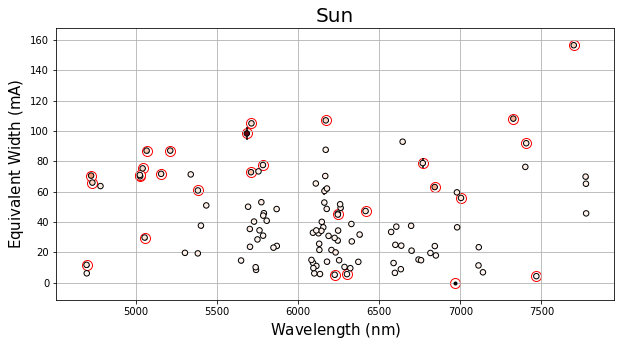

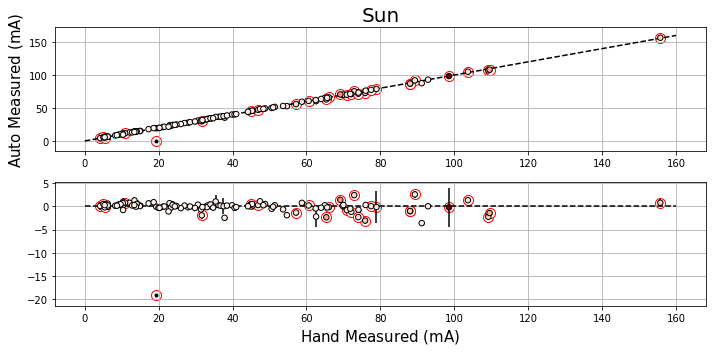

In [18]:
plot_line_info(Sun,'Sun')
plot_comparison_res(Sun,ews,'Sun',xy=[0,160])